## Задание

Мы - онлайн магазин спортивных товаров: одежды, обуви, аксессуаров и спорт-питания. На главной странице магазина мы показываем пользователям баннеры с целью стимулирования своих продаж. Сейчас там случайно показывается один из 5 баннеров. Каждый баннер рекламирует конкретный продукт или всю компанию. Наши маркетологи считают, что опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения.

У менеджера компании появилось предложение от партнеров продать это место для баннера и рекламировать там другой сервис (оплата предполагается по CPC-модели).

Помогите менеджеру принять решение.
Данные доступны по ссылке: https://yadi.sk/d/12cdc3yym8NksQ

### Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})
#plt.style.available

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 50)

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Пути к директориям и файлам

In [5]:
DATASET_PATH = '../test_data/ha_data.csv'

### Загрузка данных

Описание датасета: У вас есть информация о том, какой баннер показался пользователю, кликнул ли он на него, а так же информация о покупках пользователей.

∙ **title** - тип события (показ, клик или покупка)  
∙ **user** - уникальный идентификатор клиента  
∙ **product** - продукт баннера/покупки  
∙ **page_id** - уникальный номер страницы для связки событий (NA для покупок)  
∙ **order_id** - уникальный номер покупки (NA для кликов и показов баннера)  
∙ **time** - время совершения действия  
∙ **site_version** - версия сайта (мобильная или десктопная)  

In [6]:
df = pd.read_csv(DATASET_PATH, sep=';')
df.head()

,order_id,page_id,product,site_version,time,title,user
0,nan,3.00,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,nan,3699687.00,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,nan,14.00,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,nan,10362176.00,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,nan,14.00,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


### Приведение типов

**id**

Добавляем индекс, чтобы в будущем мы могли по нему обращаться к данным

In [7]:
df['id'] = df.index.tolist()
df.set_index('id', inplace=True)

In [8]:
df[:10]

,order_id,page_id,product,site_version,time,title,user
id,,,,,,,
0,nan,3.00,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,nan,3699687.00,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,nan,14.00,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,nan,10362176.00,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,nan,14.00,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
5,nan,18.00,sneakers,desktop,2017-01-11 09:22:12,banner_show,user_2
6,nan,18.00,sneakers,desktop,2017-01-11 09:24:43,banner_click,user_2
7,nan,26.00,sneakers,desktop,2017-01-09 09:38:51,banner_show,user_3
8,nan,2004233.00,sports_nutrition,desktop,2017-01-09 09:12:45,banner_show,user_3


**order_id, page_id**

Нам не нужно будет узнавать статистические характеристики по столбцам **order_id, page_id** с числовыми значениями: среднее значение, среднее квадратическое отклонение, максимум, минимум, квантили - поэтому переводим их в **категориальный признак**

In [9]:
df['order_id'] = df['order_id'].astype(str)
df['page_id'] = df['page_id'].astype(str)

**time**

Преобразуем столбец time к типу "дата"

In [10]:
df['time'] = pd.to_datetime(df['time'])

### Общая информации о данных

In [11]:
df.shape

(8471226, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      object        
 1   page_id       object        
 2   product       object        
 3   site_version  object        
 4   time          datetime64[ns]
 5   title         object        
 6   user          object        
dtypes: datetime64[ns](1), object(6)
memory usage: 517.0+ MB


In [13]:
df.nunique()

order_id         248723
page_id         7393320
product               5
site_version          2
time            5799553
title                 3
user            4254621
dtype: int64

In [14]:
df.isna().sum()

order_id        0
page_id         0
product         0
site_version    0
time            0
title           0
user            0
dtype: int64

### Обзор данных

#### Категориальные переменные

In [15]:
df.describe()

,order_id,page_id,product,site_version,time,title,user
count,8471226,8471226,8471226,8471226,8471226,8471226,8471226
unique,248723,7393320,5,2,5799553,3,4254621
top,nan,nan,clothes,mobile,2017-02-04 10:32:05,banner_show,user_1934035
freq,8222504,248722,1786438,6088340,10,7393319,23
first,NaN,NaN,NaN,NaN,2017-01-01 00:00:03,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-05-31 23:59:58,NaN,NaN


In [16]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

order_id

nan         8222504
53373.0           1
163234.0          1
513312.0          1
264248.0          1
             ...   
510299.0          1
513475.0          1
439346.0          1
487887.0          1
300043.0          1
Name: order_id, Length: 248723, dtype: int64
****************************************************************************************************

page_id

nan           248722
1638891.0          2
11745911.0         2
2909024.0          2
5300980.0          2
               ...  
1946635.0          1
19915139.0         1
20321899.0         1
19471357.0         1
18901765.0         1
Name: page_id, Length: 7393320, dtype: int64
****************************************************************************************************

product

clothes             1786438
company             1725059
sneakers            1703345
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64
***********************************************************

Как мы видим **page_id** в основном состоит только из уникальных значений, то есть каждому событию присваивается неповторящийся номер события.  
Но эти данные нам ничего не говорят и по сути дублируют обратный параметр order_id, который присваивается баннеру, через который произошла покупка. Я удаляю параметр **page_id** и мы будем работать с **order_id**.

In [17]:
df.drop("page_id", axis=1, inplace=True)

df

,order_id,product,site_version,time,title,user
id,,,,,,
0,nan,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,nan,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,nan,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,nan,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,nan,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...
8471221,nan,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,nan,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,nan,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618


## Гипотезы

Я думаю, что стоит выделить гипотезы, которые мы будем проверять.

* **Гипотеза 1**: Мы верим, что опыт взаимодействия с баннерами может различаться по сегментам баннеров более чем на 20%;  


* **Гипотеза 2**: Мы верим, что эффективность баннеров равнозначна на мобильной и декстопной версии;


* **Гипотеза 3**: Если мы будем показывать товарные баннеры, а не с брендинговые, то повысим число продаж за N срок;  


* **Гипотеза 4**: Если мы продадим баннерное место под CPC-рекламу, то мы не заметим финансовых изменений, а значит продажа невыгодна 

## Product & Title  🕵🏻‍♀️

**Давайте поближе рассмотрим какие действия совершают пользователи магазина, исходя из типа продукта на баннере**

In [18]:
df.groupby(['product', 'title']).size()

product           title       
accessories       banner_click     136254
                  banner_show     1440954
                  order             44551
clothes           banner_click     220595
                  banner_show     1453128
                  order            112715
company           banner_click     144821
                  banner_show     1580238
sneakers          banner_click     182597
                  banner_show     1453029
                  order             67719
sports_nutrition  banner_click     144918
                  banner_show     1465970
                  order             23737
dtype: int64

Из сводки сверху мы можем заметить, что пользователи **не совершают покупки, когда видят баннеры о компании**

Создадим новый датасет **new_df** и заполним его данными по типу рекламного баннера и действиям пользователя

In [19]:
data = {
    
    'banner_product': ["accessories", "clothes", "company", "sneakers", "sports_nutrition"],
    'orders': [44551, 112715, 0, 67719, 23737],
    'banner_click': [136254, 220595, 144821, 182597, 144918],
    'banner_show': [1440954, 1453128, 1580238, 1453029, 1465970]
    
}

new_df = pd.DataFrame(data)
new_df

,banner_product,orders,banner_click,banner_show
0,accessories,44551,136254,1440954
1,clothes,112715,220595,1453128
2,company,0,144821,1580238
3,sneakers,67719,182597,1453029
4,sports_nutrition,23737,144918,1465970


In [20]:
new_df.sort_values(['orders'], ascending=[False])[['banner_product', 'orders']]

,banner_product,orders
1,clothes,112715
3,sneakers,67719
0,accessories,44551
4,sports_nutrition,23737
2,company,0


Мы видим, что больше всего заказов совершено по баннеру с одеждой

### Orders - заказы 

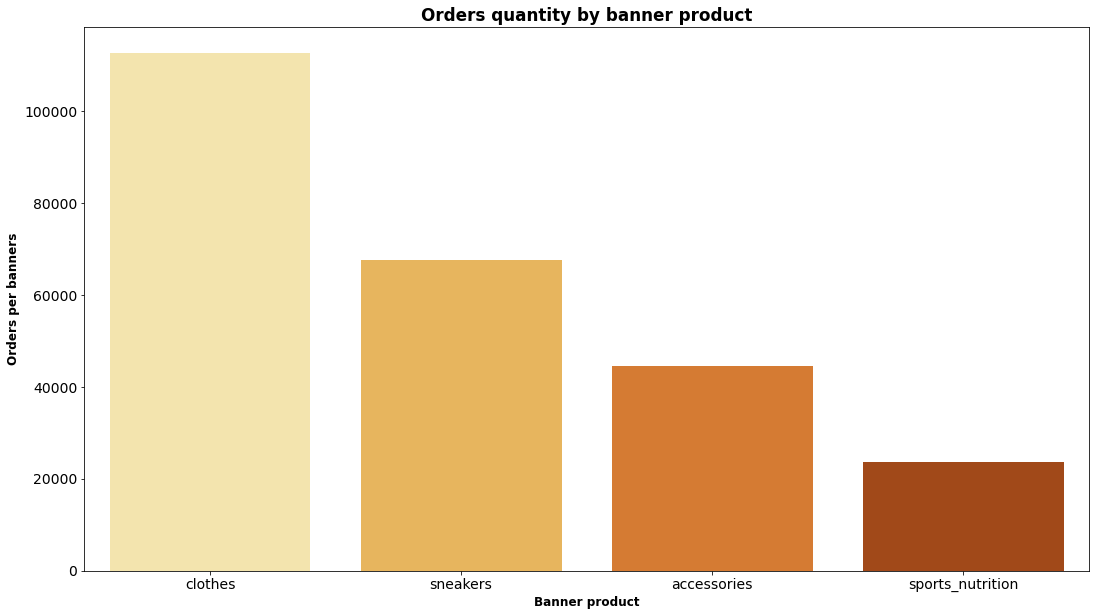

In [21]:
plt.figure(figsize=(18,10))

sns.barplot(x='banner_product', y='orders', data = new_df[(new_df['orders'] != 0)].sort_values(['orders'], ascending=[False]), palette='YlOrBr')

plt.title('Orders quantity by banner product', weight='bold')

plt.xlabel('Banner product', fontsize=12, weight='bold')
plt.ylabel('Orders per banners', fontsize=12, weight='bold')
plt.show()

Из графика видно, что пользователи совершают больше всего покупок, когда видят рекламу позиций из категории "одежда". Почти на 40% реже баннеры типа "кроссовки" приводили пользователей к покупке на сайте. 

### Clicks - клики 

In [22]:
new_df.sort_values(['banner_click'], ascending=[False])[['banner_product', 'banner_click']]

,banner_product,banner_click
1,clothes,220595
3,sneakers,182597
4,sports_nutrition,144918
2,company,144821
0,accessories,136254


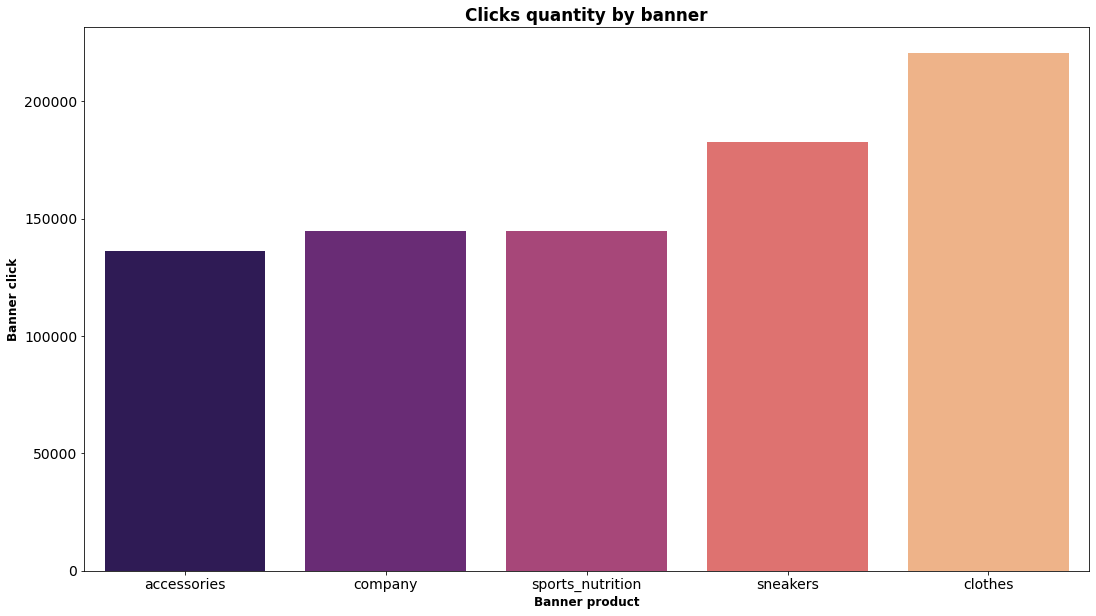

In [23]:
plt.figure(figsize=(18,10))

sns.barplot(x='banner_product', y='banner_click', data = new_df.sort_values(['banner_click']), palette='magma')

plt.title('Clicks quantity by banner', weight='bold')

plt.xlabel('Banner product', fontsize=12, weight='bold')
plt.ylabel('Banner click', fontsize=12, weight='bold')
plt.show()

Как и в предыдущем графике лидируют баннеры типа "одежда" и "кроссовки", но мы можем заметить, что все остальные категории баннеров вызывают у пользователей примерно одинаковый интерес. На баннеры "аксессуары" кликали меньше всего, но как мы видим разница по количеству кликов с последующими двумя категориями несущественна. 

### Banner show - просмотр (охват)

In [24]:
new_df.sort_values(['banner_show'], ascending=[False])[['banner_product', 'banner_show']]

,banner_product,banner_show
2,company,1580238
4,sports_nutrition,1465970
1,clothes,1453128
3,sneakers,1453029
0,accessories,1440954


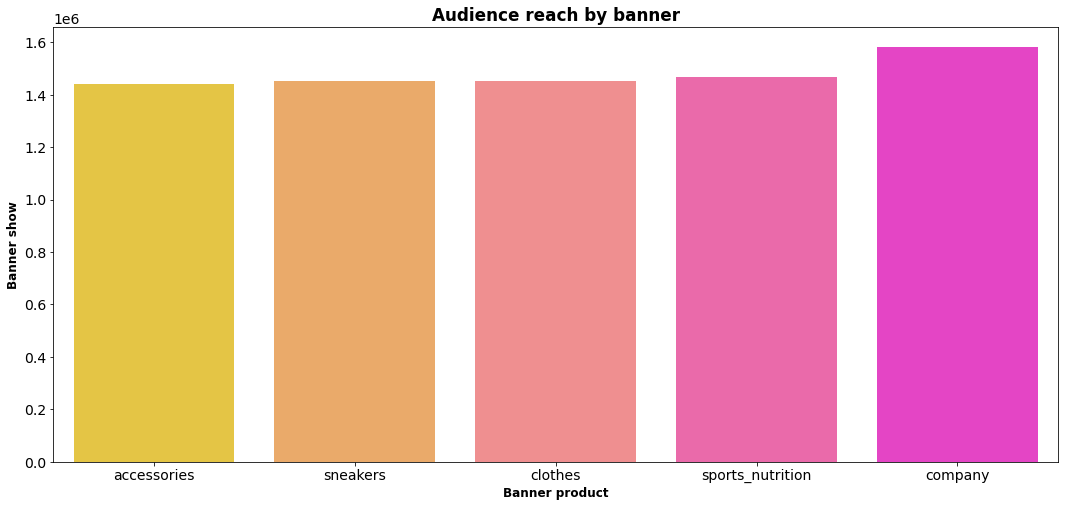

In [25]:
plt.figure(figsize=(18,8))

sns.barplot(x='banner_product', y='banner_show', data = new_df.sort_values(['banner_show']), palette='spring_r')

plt.title('Audience reach by banner', weight='bold')

plt.xlabel('Banner product', fontsize=12, weight='bold')
plt.ylabel('Banner show', fontsize=12, weight='bold')
plt.show()

#### Из графика мы видим, что охват баннеров почти везде одинаковый, но баннеры с логотипом компании просматривают чаще. В любом случае, эти просмотры не приводят нас к продажам товара.

## Site version & Title 💻📱

#### Выясним, насколько различается пользовательское поведение в зависимости от устройства. Сравниваем мобильную версию и декстоп.

In [26]:
df.groupby(['site_version', 'title']).size()

site_version  title       
desktop       banner_click     115065
              banner_show     2134640
              order            133181
mobile        banner_click     714120
              banner_show     5258679
              order            115541
dtype: int64

In [27]:
data = {
    
    'site_version': ["desktop", "mobile"],
    'orders': [133181, 115541],
    'banner_click': [115065, 714120],
    'banner_show': [2134640, 5258679]
    
}

new_df1 = pd.DataFrame(data)
new_df1

,site_version,orders,banner_click,banner_show
0,desktop,133181,115065,2134640
1,mobile,115541,714120,5258679


Мы видим, что **число заказов** различается не сильно, но пользователи охотнее **кликают и просматривают** баннеры в **мобильной версии**.  

Это наталкивает на мысль, что баннерную рекламу стоит показывать пользователям мобильной версии.  
Давайте построим графики и посмотрим на данные конкретнее.

### Orders - заказы в разрезе устройства пользователя

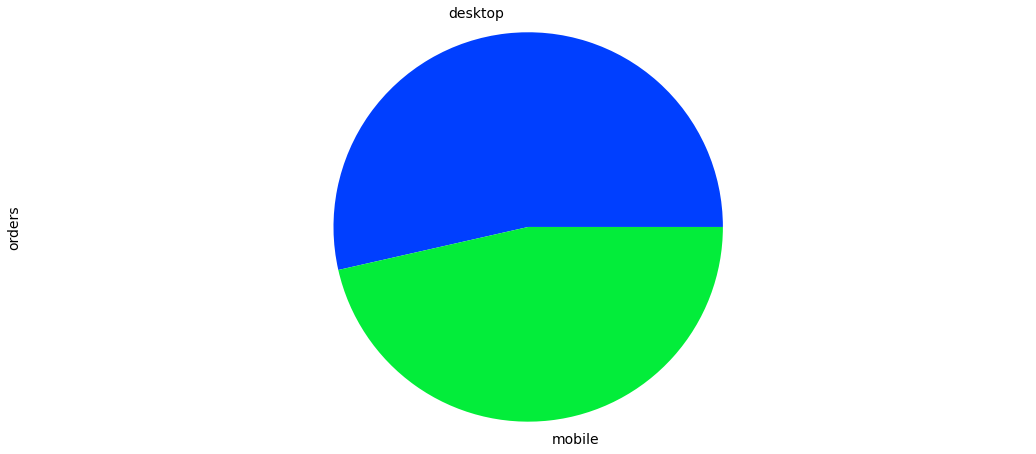

In [28]:
plt.figure(figsize = (18,8))

new_df1.orders.groupby(new_df1.site_version).sum().plot(kind='pie')
plt.axis('equal')

plt.show()

### Banner clicks - клики по баннеру в разрезе устройства пользователя

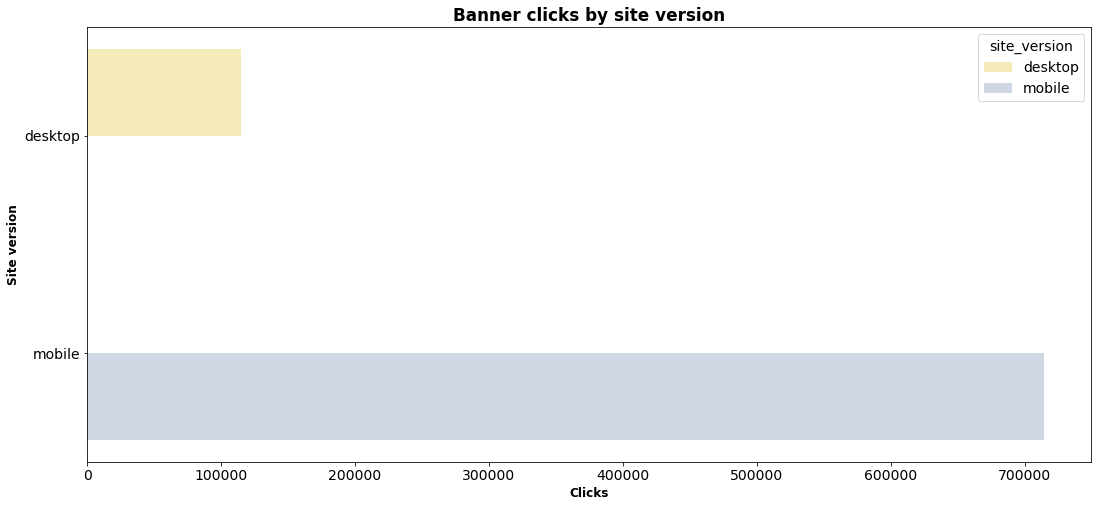

In [29]:
plt.figure(figsize=(18,8))

sns.barplot(x = 'banner_click', y = 'site_version',hue = 'site_version', data = new_df1, palette="Pastel2_r");

plt.title('Banner clicks by site version', weight='bold')

plt.xlabel('Clicks', fontsize=12, weight='bold')
plt.ylabel('Site version', fontsize=12, weight='bold')
plt.show()

### Banner show - просмотр баннера в разрезе устройства пользователя

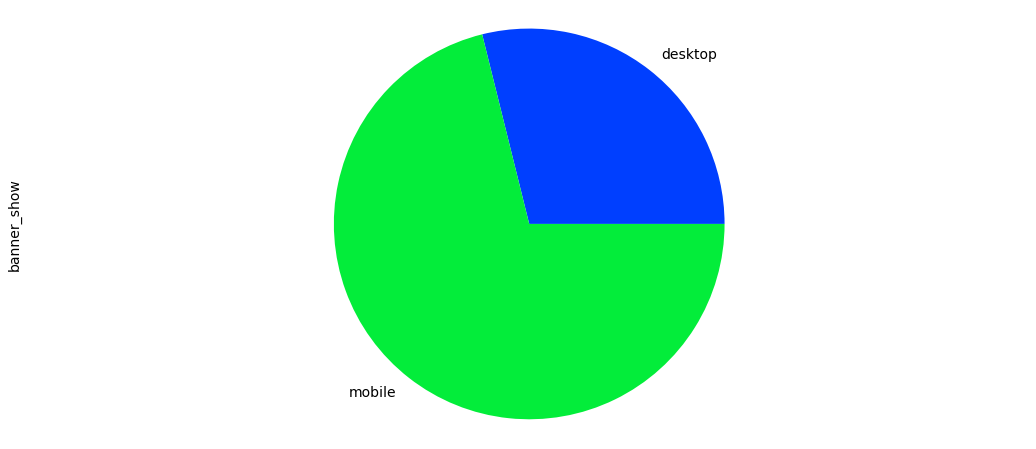

In [30]:
plt.figure(figsize = (18,8))

new_df1.banner_show.groupby(new_df1.site_version).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

Мы действительно увидели **огромный разрыв по кликам и просмотрам** в мобильной версии и декстопной в приоритет первой.  
Если рассматриваеть **заказы** как целевое действие, то пользователи лучше реагируют в декстопной версии сайта.

## Site version & Title & Product

In [31]:
df.groupby(['site_version', 'title', 'product']).size()

site_version  title         product         
desktop       banner_click  accessories           18531
                            clothes               32781
                            company               28464
                            sneakers              21419
                            sports_nutrition      13870
              banner_show   accessories          410003
                            clothes              418070
                            company              477374
                            sneakers             411598
                            sports_nutrition     417595
              order         accessories           22121
                            clothes               66977
                            sneakers              32565
                            sports_nutrition      11518
mobile        banner_click  accessories          117723
                            clothes              187814
                            company              116357
   

**Ниже мы видим разбиение пользовательских действий (просмотр, покупка, клик) по виду продукту (реклама магазина / товарных позиций) в разрезе версии сайта (моб/декстоп)**

In [32]:
df.groupby(['site_version', 'title', 'product']).count()[['order_id']]

order_id
site_version title        product                   
desktop      banner_click accessories          18531
                          clothes              32781
                          company              28464
                          sneakers             21419
                          sports_nutrition     13870
             banner_show  accessories         410003
                          clothes             418070
                          company             477374
                          sneakers            411598
                          sports_nutrition    417595
             order        accessories          22121
                          clothes              66977
                          sneakers             32565
                          sports_nutrition     11518
mobile       banner_click accessories         117723
                          clothes             187814
                          company             116357
                          sneakers            161178
                          sports_nutrition    131048
             banner_show  accessories        1030951
                          clothes            1035058
                          company            1102864
                          sneakers           1041431
                          sports_nutrition   1048375
             order        accessories          22430
                          clothes              45738
                          sneakers             35154
                          sports_nutrition     12219

In [33]:
new_df

,banner_product,orders,banner_click,banner_show
0,accessories,44551,136254,1440954
1,clothes,112715,220595,1453128
2,company,0,144821,1580238
3,sneakers,67719,182597,1453029
4,sports_nutrition,23737,144918,1465970


In [34]:
new_df1

,site_version,orders,banner_click,banner_show
0,desktop,133181,115065,2134640
1,mobile,115541,714120,5258679


##  Day & Title ⏳

Добавим новый столбец **день недели** и изучим поведение пользователей в разрезе будних дней и выходных.

In [35]:
df['day_of_week'] = df['time'].dt.day_name()

Столбец **time** можно удалить за ненадобностью

In [36]:
df.drop("time", axis=1, inplace=True)

In [37]:
df.head()

,order_id,product,site_version,title,user,day_of_week
id,,,,,,
0,nan,company,mobile,banner_show,user_0,Thursday
1,nan,company,mobile,banner_show,user_0,Tuesday
2,nan,sneakers,mobile,banner_show,user_1,Sunday
3,nan,company,mobile,banner_show,user_1,Wednesday
4,nan,sneakers,mobile,banner_click,user_1,Sunday


In [38]:
days = df.groupby(['day_of_week']).size()

days.sort_values()

day_of_week
Thursday     1179553
Friday       1188163
Saturday     1194112
Wednesday    1226023
Sunday       1226920
Monday       1228112
Tuesday      1228343
dtype: int64

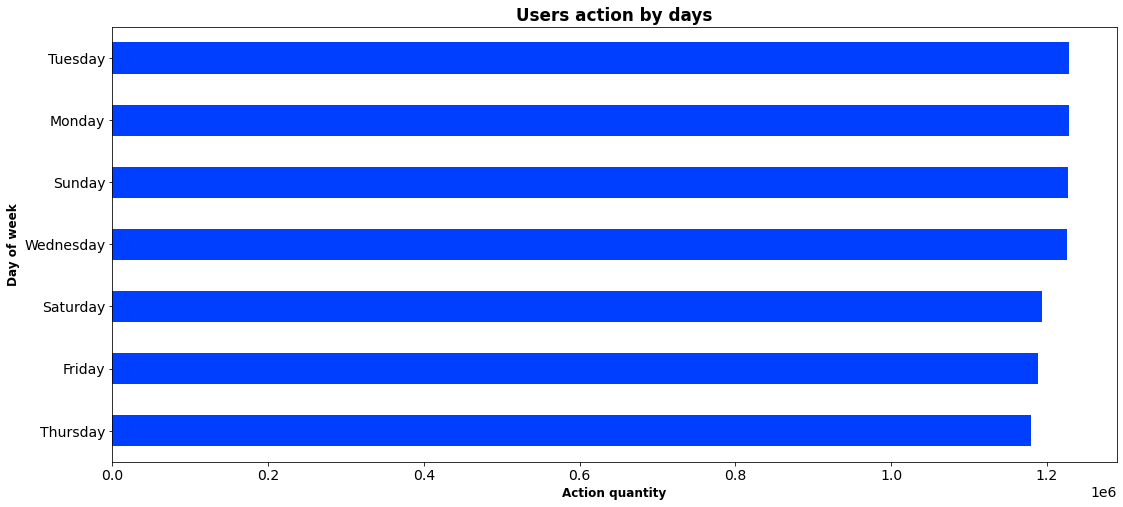

In [39]:
plt.figure(figsize=(18,8))

days = days.sort_values()
days.plot(kind="barh")
plt.title('Users action by days', weight='bold')
plt.xlabel('Action quantity', fontsize=12, weight='bold')
plt.ylabel('Day of week', fontsize=12, weight='bold')

plt.show()

Из значений выше мы видим, что пользователи взаимодействуют с магазином примерно одинаково: **меньше всего в четверг и больше всего во вторник**  

Теперь взглянем более детально

### День недели в разрезе пользовательских действий с баннерами

In [40]:
df.groupby(['day_of_week', 'title']).size()

day_of_week  title       
Friday       banner_click     116142
             banner_show     1037022
             order             34999
Monday       banner_click     120466
             banner_show     1072229
             order             35417
Saturday     banner_click     116713
             banner_show     1042262
             order             35137
Sunday       banner_click     119960
             banner_show     1070807
             order             36153
Thursday     banner_click     115818
             banner_show     1028939
             order             34796
Tuesday      banner_click     120086
             banner_show     1072034
             order             36223
Wednesday    banner_click     120000
             banner_show     1070026
             order             35997
dtype: int64

### День недели в разрезе действий с категориями баннеров

In [41]:
df.groupby(['day_of_week', 'product']).size()

day_of_week  product         
Friday       accessories         227806
             clothes             249923
             company             242484
             sneakers            239102
             sports_nutrition    228848
Monday       accessories         235110
             clothes             259437
             company             249713
             sneakers            246708
             sports_nutrition    237144
Saturday     accessories         228304
             clothes             251335
             company             243713
             sneakers            240507
             sports_nutrition    230253
Sunday       accessories         234836
             clothes             260164
             company             249331
             sneakers            246116
             sports_nutrition    236473
Thursday     accessories         226299
             clothes             247610
             company             240992
             sneakers            236944
          

## Выводы

* **Гипотеза 1**: Мы верим, что опыт взаимодействия с баннерами может различаться по сегментам баннеров более чем на 20%;  


Да, гипотезу подтверждаем. Опыт взаимодействия отличается. Мы смогли заметить, что баннеры типа "компания" не приводят к продаже каких-либо товарных позиций. Баннеры, на которых изображена одежда или кроссовки наиболее часто приводят к покупкам и кликам. В любом случае, в разрезе пользовательских действий баннеры просматривают: **7393319** раз, а покупки и клики совершаются немного больше миллиона раз суммарно. Соответственно - **248722 покупок и 829185 по кликам.**

* **Гипотеза 2**: Мы верим, что эффективность баннеров равнозначна на мобильной и декстопной версии;
    
    
Как уже говорилось ранее, был замечен огромный разрыв по кликам и просмотрам в мобильной версии и декстопной версии сайта. Через мобильное устройство пользователь охотнее реагирует на рекламное предложение. 

Если рассматриваеть **заказы** то поведение пользователей не сильно отличается от версий сайта. Но на декстопной версии мы заметили небольшое увеличение количества заказов.

* **Гипотеза 3**: Если мы будем показывать товарные баннеры, а не с брендинговые, то повысим число продаж за N срок;  

Подтверждаем. Потому что баннер с информацией о компании не привел к продажам.

* **Гипотеза 4**: Если мы продадим баннерное место под CPC-рекламу, то мы не заметим финансовых изменений, а значит продажа невыгодна

К сожалению, мы не знаем средний чек по каждой товарной группе и средний чек в целом, чтобы мы могли посчитать прибыль от баннеров, которые привели к покупке. Однако, мы знаем, что показ баннеров для нас бесплатен и ROI в любом случае будет положителен.
Так же, мы не располагаем данными, какую стоимость за клик нам предлагает партнерская сеть по CPC.

Исходя из проведенного анализа, мы можем предположить, что:
* **Брендинговые баннеры для нас неэффективны**  
* **Баннеры на мобильной версии больше привлекают пользователя для взаимодействия (mobile-6088340, desktop -2382886)**
* **Партнер по CPC мог разместить свои баннеры на мобильной версии сайта. На декстоп версии сайта нам стоит оставить товарные баннеры**